In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# config to get better plot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi'] # larger image
matplotlib.rcParams['axes.labelcolor'] =  'green' # default green for label

matplotlib.rcParams['axes.linewidth'] =  0.5

from matplotlib import pyplot as plt
import seaborn as sb # add seaborn for pretty plot (vs default one in matplotlib)

import warnings # just to avoid any warning to make this notebook prettier
warnings.filterwarnings('ignore')

In [2]:
# import pytraj
import pytraj as pt

# load sample data
traj = pt.iterload('tz2.nc', 'tz2.parm7')
traj

pytraj.TrajectoryIterator, 101 frames: 
Size: 0.000503 (GB)
<Topology: 223 atoms, 13 residues, 1 mols, non-PBC>
           

In [3]:
# find hbond
hb = pt.hbond(traj)

distance_mask = hb.get_amber_mask()[0]
print('hbond distance mask: {} \n '.format(distance_mask))

angle_mask = hb.get_amber_mask()[1]
print('hbond angle mask: {} \n'.format(angle_mask))

print("hbond data")
print(hb.data) # 1: have hbond; 0: does not have hbond

hbond distance mask: [':1@OG :2@H' ':5@O :3@HG1' ':3@O :1@H3' ..., ':10@O :12@HZ2' ':5@OE2 :6@H'
 ':7@O :9@H'] 
 
hbond angle mask: [':1@OG :2@H :2@N' ':5@O :3@HG1 :3@OG1' ':3@O :1@H3 :1@N' ...,
 ':10@O :12@HZ2 :12@NZ' ':5@OE2 :6@H :6@N' ':7@O :9@H :9@N'] 

hbond data
<pytraj.DatasetList with 14 datasets>
total_solute_hbonds
[0 1 0 ..., 0 0 0]

SER1_OG-TRP2_N-H
[0 1 0 ..., 0 0 0]

GLU5_O-THR3_OG1-HG1
[0 0 0 ..., 0 0 0]
...

GLU5_OE2-ASN6_N-H
[0 0 0 ..., 0 0 0]

GLY7_O-TRP9_N-H
[0 0 0 ..., 0 0 0]


In [4]:
dist = pt.distance(traj, hb.get_amber_mask()[0])
print('all hbond distances: ', dist)

all hbond distances:  [[ 2.1924577   1.92054906  2.35839995 ...,  3.93999355  3.81974987
   4.45726496]
 [ 8.03544864  3.95953378  4.2438701  ...,  6.47548095  4.97960639
   6.47500662]
 [ 4.38455889  3.25022817  3.38755539 ...,  6.45264846  7.37518528
   6.0956301 ]
 ..., 
 [ 6.97851158  9.15141704  8.42936098 ...,  7.2329342   6.74667953
   5.96993506]
 [ 4.40668236  4.33245685  4.49102881 ...,  5.0485394   4.88464996
   6.04310722]
 [ 2.10765322  3.28954633  4.13369896 ...,  2.22195659  3.01349072
   3.48705884]]


In [5]:
angle = pt.angle(traj, hb.get_amber_mask()[1])
angle

array([[ 128.26687651,  140.4319339 ,  130.87185144, ...,   98.56379937,
         107.85608806,   89.34456598],
       [  65.2705368 ,  165.05104503,   81.00468938, ...,   66.48602645,
          84.2725392 ,   78.31224007],
       [ 127.47793034,  153.71941428,  123.90214257, ...,   69.92092063,
          47.03151176,   46.42478935],
       ..., 
       [  24.45322069,   57.47276975,   17.06828405, ...,   50.39660114,
          91.57680164,   86.05409532],
       [ 123.22038163,  124.99010481,  114.02273251, ...,   93.20375796,
         103.8316453 ,   79.2753432 ],
       [ 151.76613517,   87.21904908,   82.82755457, ...,  142.70348966,
         111.75891022,  118.95158863]])

### plot demo

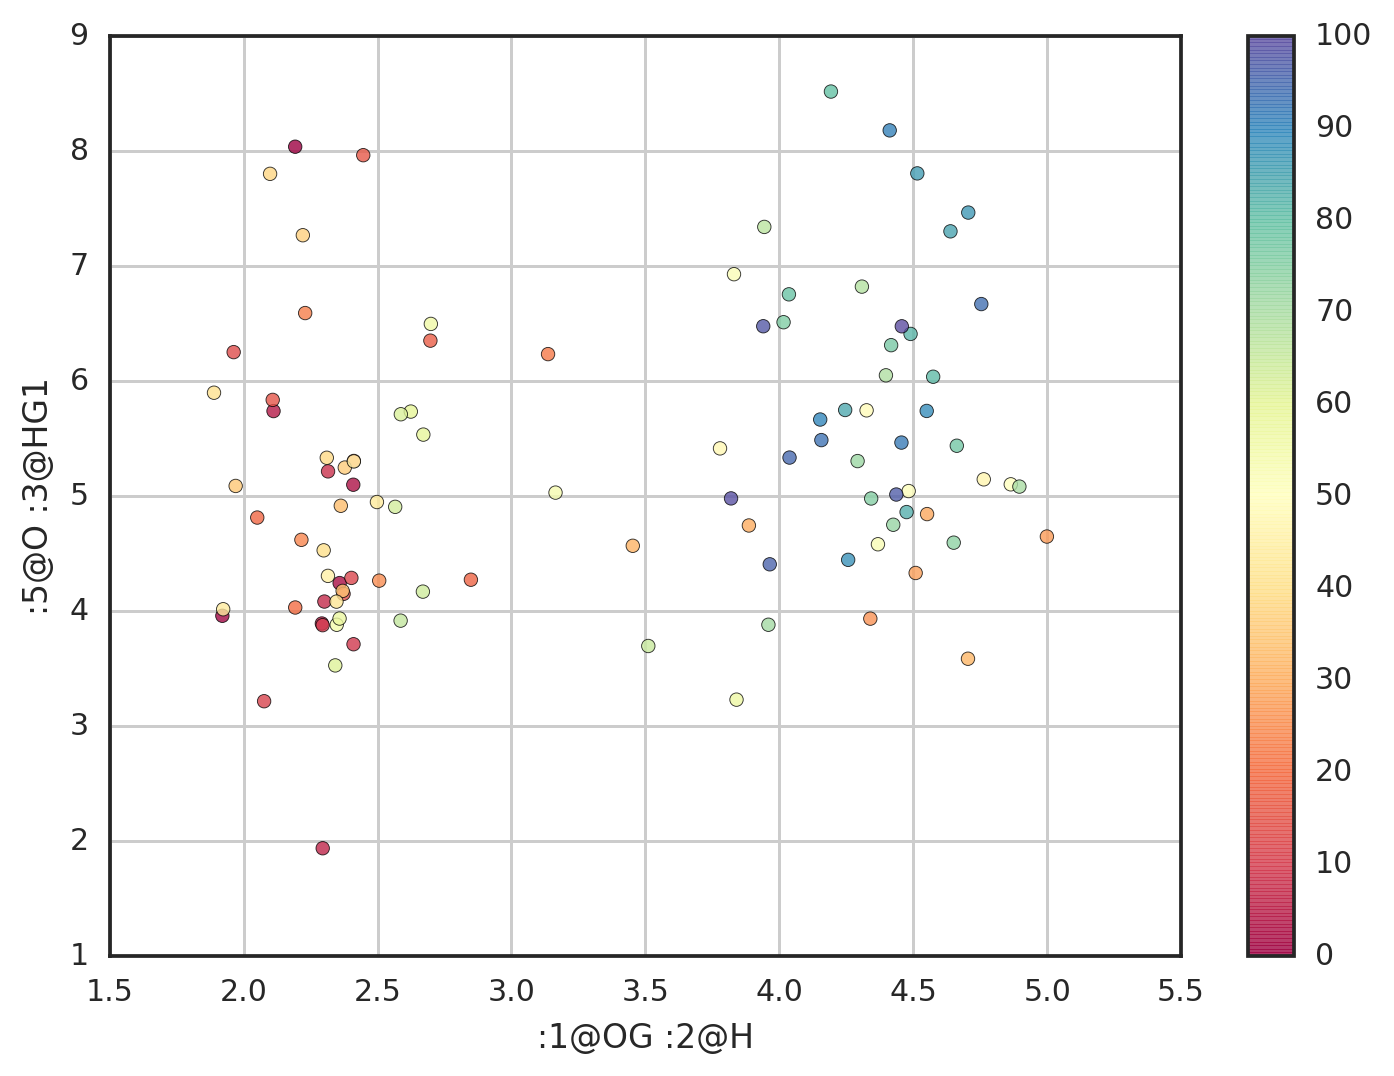

In [6]:
sb.color_palette('deep', n_colors=6, desat=0.5)
sb.set_style(style='white')

# scatter plot for distance between ':1@OG :2@H' and ':5@O :3@HG1'
# the point is colored by frame number (total frame = traj.n_frames (101))
fig = plt.scatter(dist[0], dist[1], marker='o', c=range(traj.n_frames), alpha=0.8, cmap='Spectral')
plt.colorbar()
plt.grid()
plt.xlabel(':1@OG :2@H')
plt.ylabel(':5@O :3@HG1')

### Do some statistics

In [7]:
def stat(hb, data, distance_or_angle_mask):
    '''
    
    Parameters
    ----------
    hb : get from `pt.hbond(traj, ...)`
    data : either distance or angle
    distance_mask : distance mask
    '''
    import numpy as np
    arr = hb.data[1:].values == 1
    
    std_ = {}
    mean_ = {}
    for idx, mask in enumerate(distance_or_angle_mask):
        mask = mask.replace('@', '_')
        std_[mask] = np.std(data[idx][arr[idx]])
        mean_[mask] = np.mean(data[idx][arr[idx]])
    
    return mean_, std_

In [8]:
stat(hb, dist, distance_mask)

({':10@O :10@HG1': 1.9748354521175817,
  ':10@O :12@HZ1': 1.9821660107151913,
  ':10@O :12@HZ2': 1.9919561276430415,
  ':10@OG1 :12@HZ1': 2.0933974614821733,
  ':10@OG1 :8@HZ3': 2.0318465603995195,
  ':1@OG :2@H': 1.9877602413078141,
  ':2@O :4@H': 2.024368646624378,
  ':3@O :1@H3': 2.1474342032636846,
  ':3@OG1 :6@HD21': 1.9911275635014065,
  ':5@O :3@HG1': 1.9397412032380126,
  ':5@OE2 :6@H': 1.8608969749703308,
  ':6@O :8@H': 2.0379229960419041,
  ':7@O :9@H': 2.0647911659846647},
 {':10@O :10@HG1': 0.15869117394166915,
  ':10@O :12@HZ1': 0.066799383615652963,
  ':10@O :12@HZ2': 0.0,
  ':10@OG1 :12@HZ1': 0.0,
  ':10@OG1 :8@HZ3': 0.0,
  ':1@OG :2@H': 0.075559413677526596,
  ':2@O :4@H': 0.0,
  ':3@O :1@H3': 0.0,
  ':3@OG1 :6@HD21': 0.072596777856622746,
  ':5@O :3@HG1': 0.0,
  ':5@OE2 :6@H': 0.046113957599139832,
  ':6@O :8@H': 0.0,
  ':7@O :9@H': 0.0})

In [9]:
stat(hb, angle, angle_mask)

({':10@O :10@HG1 :10@OG1': 138.92086564596366,
  ':10@O :12@HZ1 :12@NZ': 148.28773893308082,
  ':10@O :12@HZ2 :12@NZ': 137.44328883519057,
  ':10@OG1 :12@HZ1 :12@NZ': 141.56305755865677,
  ':10@OG1 :8@HZ3 :8@NZ': 147.54884869246948,
  ':1@OG :2@H :2@N': 137.97842992484198,
  ':2@O :4@H :4@N': 145.91068614258742,
  ':3@O :1@H3 :1@N': 137.2488324606623,
  ':3@OG1 :6@HD21 :6@ND2': 155.89624053475271,
  ':5@O :3@HG1 :3@OG1': 161.50380087671053,
  ':5@OE2 :6@H :6@N': 160.68310341915685,
  ':6@O :8@H :8@N': 151.75294915997674,
  ':7@O :9@H :9@N': 149.91384027241048},
 {':10@O :10@HG1 :10@OG1': 2.9717056812209393,
  ':10@O :12@HZ1 :12@NZ': 1.2669718312419604,
  ':10@O :12@HZ2 :12@NZ': 0.0,
  ':10@OG1 :12@HZ1 :12@NZ': 0.0,
  ':10@OG1 :8@HZ3 :8@NZ': 0.0,
  ':1@OG :2@H :2@N': 4.1608017031247275,
  ':2@O :4@H :4@N': 0.0,
  ':3@O :1@H3 :1@N': 0.0,
  ':3@OG1 :6@HD21 :6@ND2': 6.6837505843576395,
  ':5@O :3@HG1 :3@OG1': 0.0,
  ':5@OE2 :6@H :6@N': 9.3388091911946418,
  ':6@O :8@H :8@N': 0.0,
  ':7@O :